#### Here we are going to implement our own framework a little bit different from the base article  and compare our own process with their data and see if it's better

In [2]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [3]:
#creation d'un dataframe panda
df=pd.read_excel("Concrete_Data.xls")
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [4]:
# Renommage des noms des variables caracteristiques
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

data.head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


Variable  Cement


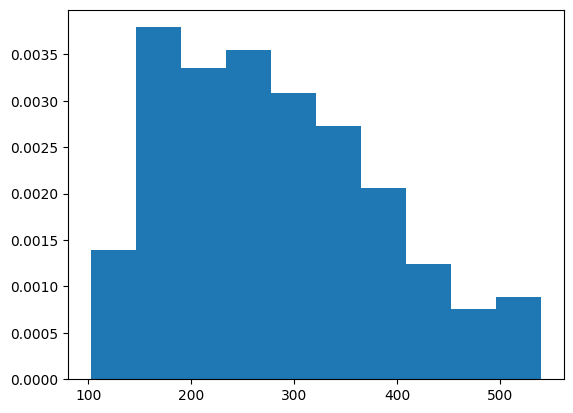

Variable  BlastFurnaceSlag


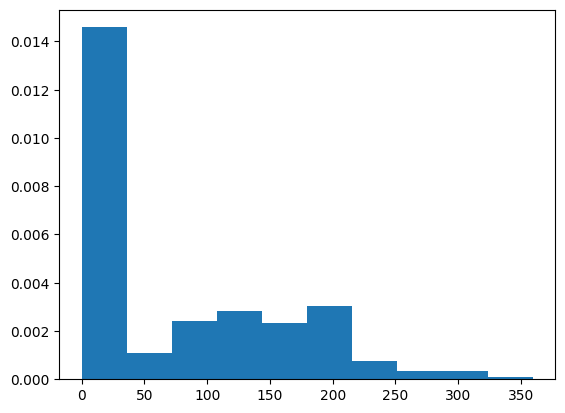

Variable  FlyAsh


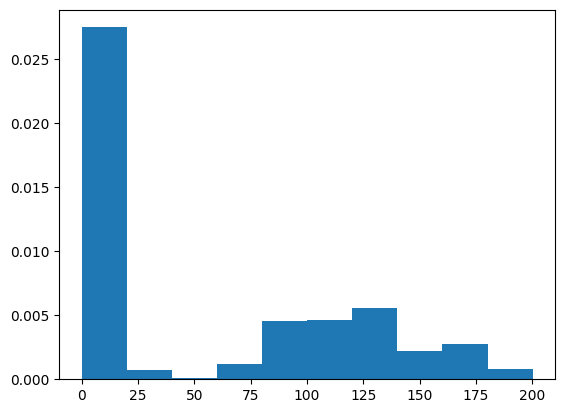

Variable  Water


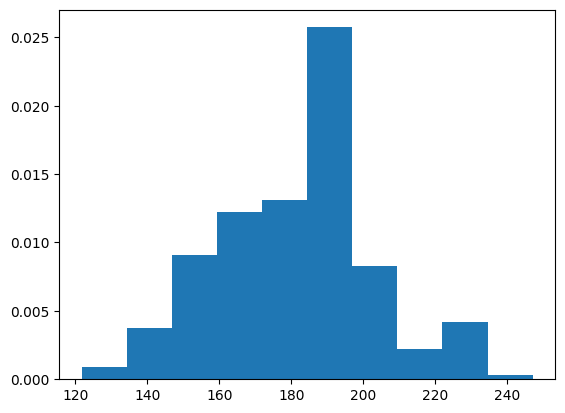

Variable  Superplasticizer


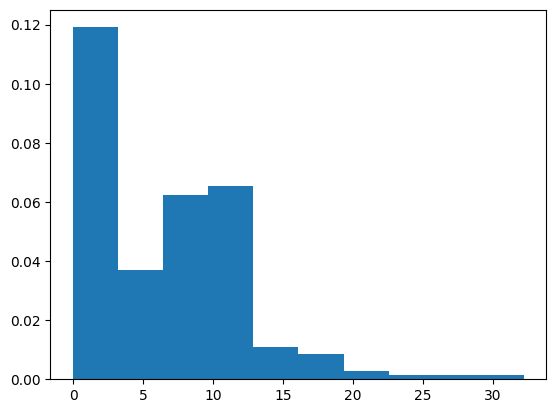

Variable  CoarseAggregate


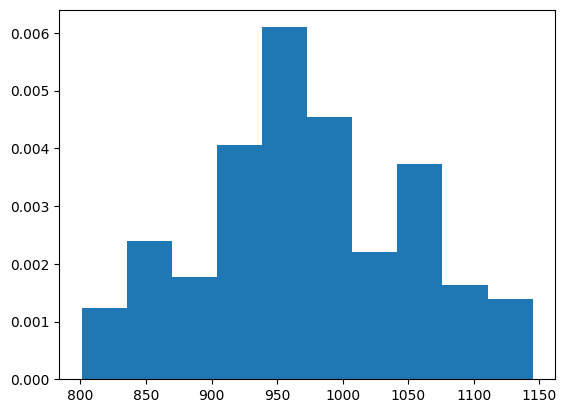

Variable  FineAggregate


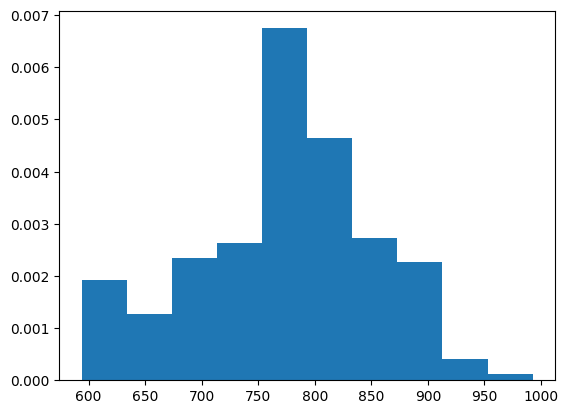

Variable  Age


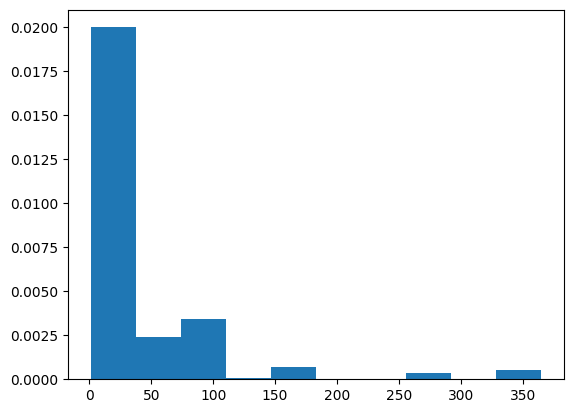

Variable  CC_Strength


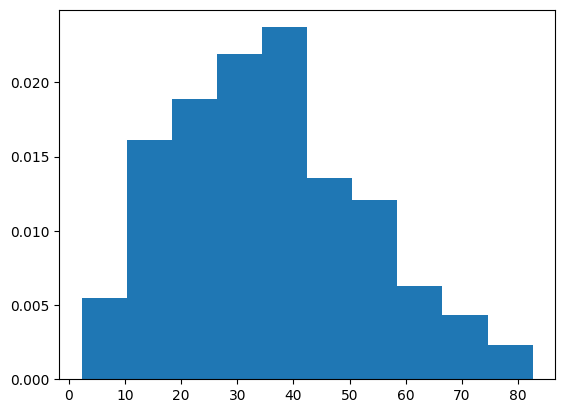

In [5]:
#histogramme de chaque variable
for name in data.columns:
  print('Variable ', name)
  plt.hist(data[name],density=True)
  plt.show()

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [7]:
from sklearn import linear_model

cl = linear_model.Lasso(alpha=0.1)

cl.fit(X, y)
print(cl.coef_)

[ 0.11963651  0.10365413  0.08784001 -0.15206524  0.2839412   0.0176514
  0.019872    0.11417848]


In [8]:
# Normalisation robuste qui nous epargne de l'effet des outliers
from sklearn.preprocessing import RobustScaler

scale_data=RobustScaler().fit_transform(X)
scale_data.shape

(1030, 8)

In [9]:
norm_data=pd.DataFrame(scale_data)
norm_data

,0,1,2,3,4,5,6,7
0,1.694528,-0.153900,0.000000,-0.848708,-0.378937,0.739220,-1.112413,0.000000
1,1.694528,-0.153900,0.000000,-0.848708,-0.378937,0.893224,-1.112413,0.000000
2,0.378113,0.842952,0.000000,1.586716,-0.625000,-0.369610,-1.993659,4.938776
3,0.378113,0.842952,0.000000,1.586716,-0.625000,-0.369610,-1.993659,6.877551
4,-0.471372,0.772298,0.000000,0.258303,-0.625000,0.106776,0.494250,6.775510
...,...,...,...,...,...,...,...,...
1025,0.022205,0.657573,0.763507,-0.199262,0.250984,-1.005133,-0.120473,0.000000
1026,0.312768,-0.153900,0.977425,0.405904,0.398622,-1.541068,0.364213,0.000000
1027,-0.789215,0.821266,0.918238,0.284133,-0.024606,-0.776181,0.005266,0.000000
1028,-0.721967,1.152151,0.000000,-0.346863,0.487205,0.221766,0.100913,0.000000


In [10]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age"]
curr_col_names = list(norm_data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

normData = norm_data.rename(columns=mapper)

normData.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,1.694528,-0.153900,0.0,-0.848708,-0.378937,0.739220,-1.112413,0.000000
1,1.694528,-0.153900,0.0,-0.848708,-0.378937,0.893224,-1.112413,0.000000
2,0.378113,0.842952,0.0,1.586716,-0.625000,-0.369610,-1.993659,4.938776
3,0.378113,0.842952,0.0,1.586716,-0.625000,-0.369610,-1.993659,6.877551
4,-0.471372,0.772298,0.0,0.258303,-0.625000,0.106776,0.494250,6.775510


Variable  Cement


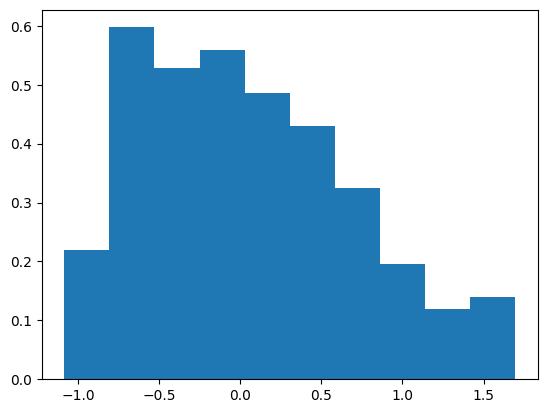

Variable  BlastFurnaceSlag


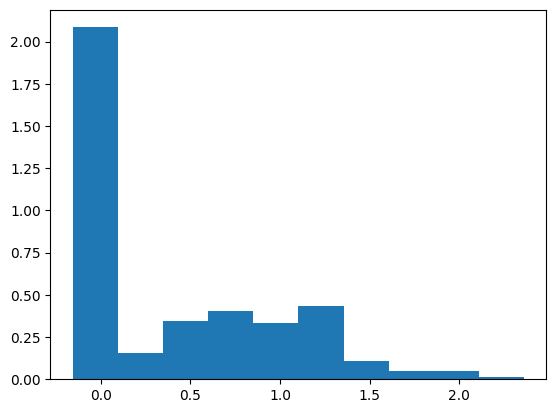

Variable  FlyAsh


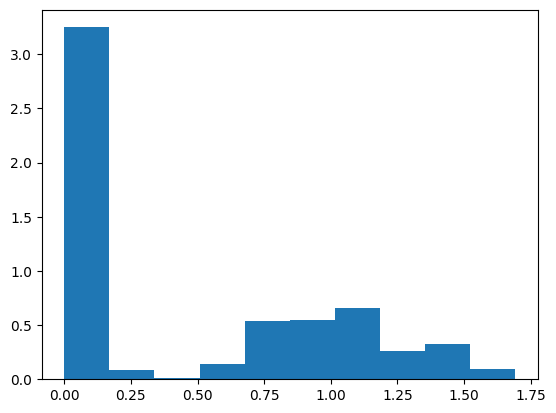

Variable  Water


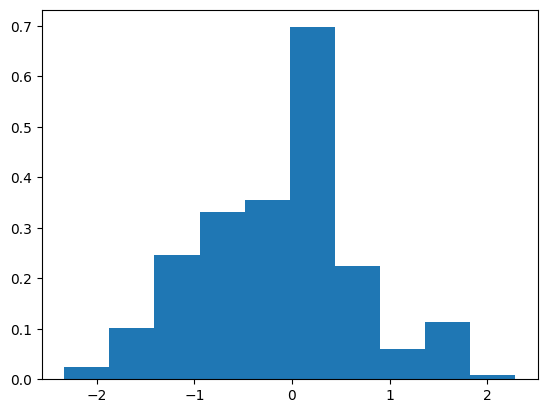

Variable  Superplasticizer


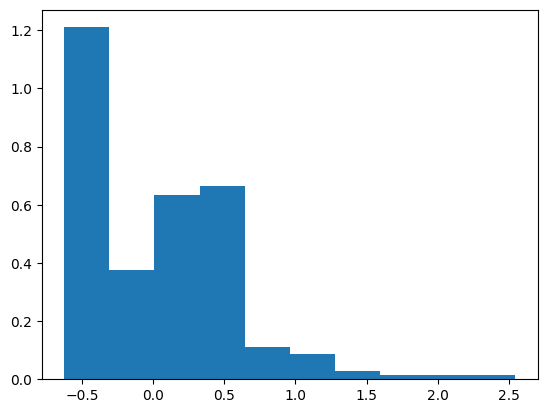

Variable  CoarseAggregate


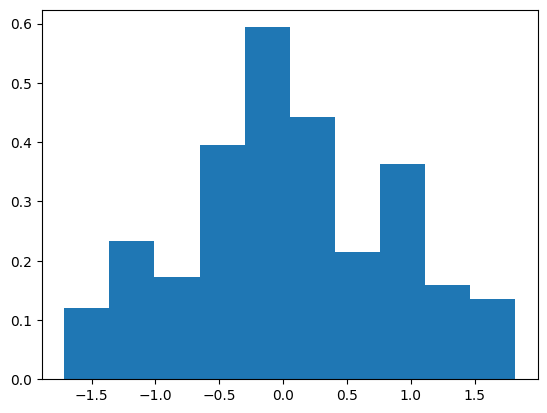

Variable  FineAggregate


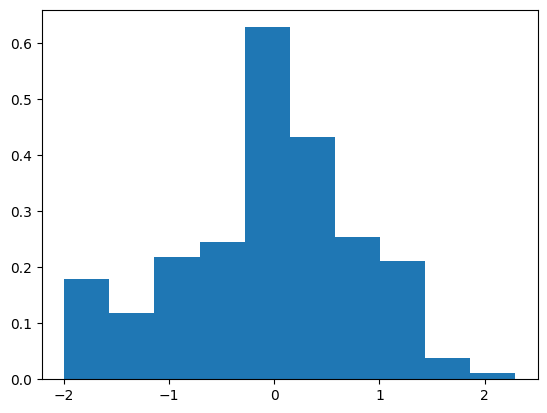

Variable  Age


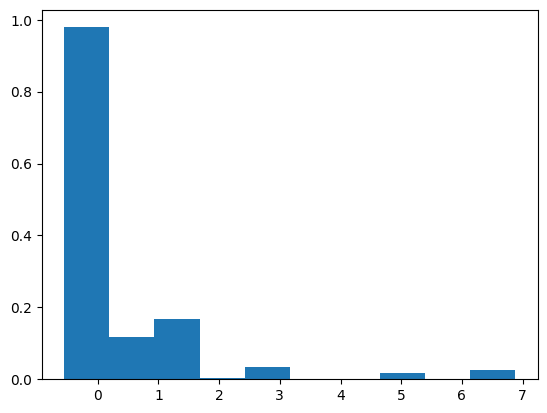

In [11]:
#histogramme de chaque variable
for name in normData.columns:
  print('Variable ', name)
  plt.hist(normData[name],density=True)
  plt.show()

### Commentaire: 
Nous observons que la normalisation robuste ne modifie pas la distribution de nos donnees tout comme la normalisation standard.

Elle modifie juste l'intervalle des valeurs c'est a dire qu'elle la reduit.

In [12]:
normData

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,1.694528,-0.153900,0.000000,-0.848708,-0.378937,0.739220,-1.112413,0.000000
1,1.694528,-0.153900,0.000000,-0.848708,-0.378937,0.893224,-1.112413,0.000000
2,0.378113,0.842952,0.000000,1.586716,-0.625000,-0.369610,-1.993659,4.938776
3,0.378113,0.842952,0.000000,1.586716,-0.625000,-0.369610,-1.993659,6.877551
4,-0.471372,0.772298,0.000000,0.258303,-0.625000,0.106776,0.494250,6.775510
...,...,...,...,...,...,...,...,...
1025,0.022205,0.657573,0.763507,-0.199262,0.250984,-1.005133,-0.120473,0.000000
1026,0.312768,-0.153900,0.977425,0.405904,0.398622,-1.541068,0.364213,0.000000
1027,-0.789215,0.821266,0.918238,0.284133,-0.024606,-0.776181,0.005266,0.000000
1028,-0.721967,1.152151,0.000000,-0.346863,0.487205,0.221766,0.100913,0.000000


##### Regression de Lasso pour la selection de variable

In [13]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1, random_state=42)

clf.fit(normData, y)
print(clf.coef_)

[15.73441032 11.38679459  6.86187426 -5.69964405  2.85733821  0.
 -0.01951756  5.43509998]


### Commentaire  : On constate que:
Sans normalisation, nous avons l'ordre suivant pour les caracteristiques:superplastifiant, ciment, age,scories, cendre voallante, aggregats fin, aggregats de coarse,  et finalemnt l'eau.

Apres la normalisation,on obtient plutot l'ordre suivant : ciment, scories, cendre volante, age, superplastifiant, aggregat de coarse, aggregat fin et l'eau.

Cela signifie que si nous selection 7 variables pertinentes, on aura les meme variables  mais si nous selectionnons moins de 7 variables comme variables pertinentes, on aura des resultats differents selon que nous ayons normalise ou pas.

### Elimination des donnees aberrantes a l'aide d'isolation forest

In [14]:
y = np.array(y)
X = np.array(normData)
X,y

(array([[ 1.69452815, -0.15389997,  0.        , ...,  0.73921971,
         -1.11241268,  0.        ],
        [ 1.69452815, -0.15389997,  0.        , ...,  0.89322382,
         -1.11241268,  0.        ],
        [ 0.37811261,  0.84295208,  0.        , ..., -0.36960986,
         -1.99365932,  4.93877551],
        ...,
        [-0.78921491,  0.82126618,  0.91823793, ..., -0.7761807 ,
          0.00526599,  0.        ],
        [-0.72196669,  1.1521511 ,  0.        , ...,  0.22176591,
          0.10091349,  0.        ],
        [-0.07613006,  0.54914306,  0.66204447, ..., -1.06262834,
         -0.19355185,  0.        ]]),
 array([79.98611076, 61.88736576, 40.26953526, ..., 23.69660064,
        32.76803638, 32.40123514]))

In [15]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV, cross_val_score

model = IsolationForest(random_state=42)

param_grid = {
              'contamination': ['auto',0,0.05, 0.1,0.15,0.2,0.25,0.30,0.35,0.4,0.45,0.5]            
              }

grid_search = GridSearchCV(model,param_grid,scoring="neg_mean_squared_error", 
                        refit=True,return_train_score=True)
grid_search.fit(X, y)

best_model = grid_search.fit(X, y)

print('Optimum parameters', best_model.best_params_)

Optimum parameters {'contamination': 0.05}


In [16]:
# Now we will fit an IsolationForest model to the training data (not the 
# test data) using the optimum settings we identified using the grid search above.

# Running the Isolation Forest model will return a Numpy array of predictions
# containing the outliers we need to remove. 

iforest=IsolationForest(random_state=42, contamination=0.05)

# Perform fit on X and returns labels for X. Returns -1 for outliers and 1 for inliers.
iforest_y_pred = iforest.fit_predict(X)

iforest_y_pred.shape


(1030,)

In [17]:
X_iforest, y_iforest = X[(iforest_y_pred != -1), :], y[(iforest_y_pred != -1)]

In [18]:
print(X_iforest.shape, y_iforest.shape)

(978, 8) (978,)


#### Commentaire :
On obtient toujours la meme quantite de donnees aberrantes, cela signifie que la normalisation robuste n'a pas vraiment impacte ces resultats.
Serait ce t'elle reellement efficace?

In [19]:
#generer des valeur aleatoire de alpha
from numpy.random import randint,randn
from numpy.random import seed
seed(1)
values = randn(1, 100)
values

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
        -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
         1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
        -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
        -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
        -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
        -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
        -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
        -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
        -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
         0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
         0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
        -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
        -0.07557171,  1.13162939,  1.51981682,  2.1

In [20]:
alpha_positif = [ val for val in values[0] if val >0]

In [21]:
alpha_positif[:10]

[1.6243453636632417,
 0.8654076293246785,
 1.74481176421648,
 0.31903909605709857,
 1.462107937044974,
 1.1337694423354374,
 0.04221374671559283,
 0.5828152137158222,
 1.1447237098396141,
 0.9015907205927955]

In [22]:
def look_lasso_solution(alpha_positif):
    sol = []
    for coef in alpha_positif:
        clf = linear_model.Lasso(alpha=coef, random_state=42)
        # clf.fit(normData, y)
        clf.fit(X_iforest, y_iforest)
        feature_importance_dict = dict(zip(normData.columns, clf.coef_))
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
        sol.append({
            "feature_importance": sorted_feature_importance,
            "alpha": coef,
        })
    return sol

In [23]:
solution = look_lasso_solution(alpha_positif[:12])

Cement: 8.536755958423063
Age: 4.487438475625674
Superplasticizer: 4.131717897169647
Water: -3.0693082349431604
BlastFurnaceSlag: 2.6069280770804215
FineAggregate: -0.17499533122710112
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.6243453636632417


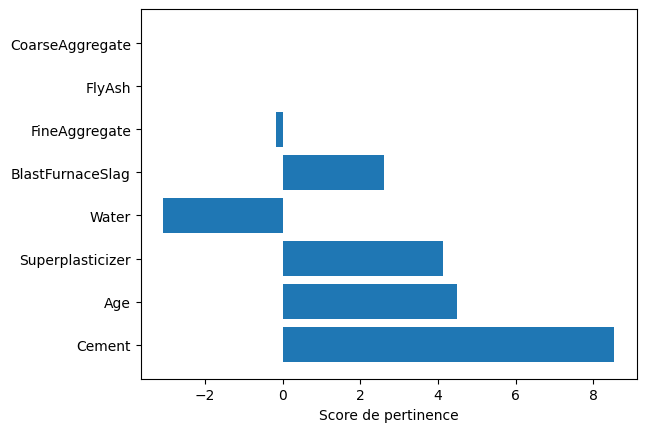

Cement: 10.497304379809561
Superplasticizer: 5.726414010832814
Age: 5.629149224740881
BlastFurnaceSlag: 4.996196436097493
Water: -4.761319914697749
FineAggregate: -1.2763355740521154
CoarseAggregate: -0.3428730127949528
FlyAsh: 0.0
alpha =  0.8654076293246785


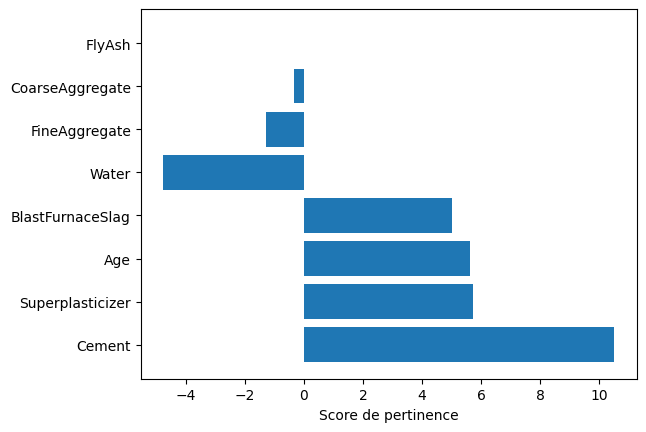

Cement: 8.19728758927726
Age: 4.307214289379574
Superplasticizer: 3.8264882065311547
Water: -2.849576620033624
BlastFurnaceSlag: 2.194069619222561
FineAggregate: -0.03329504061787257
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.74481176421648


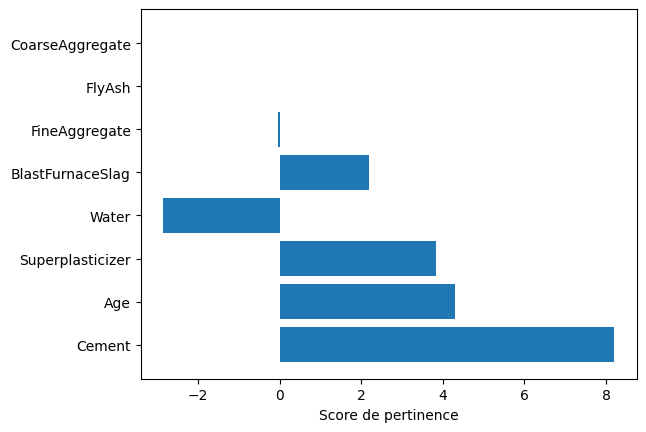

Cement: 11.776597750455561
BlastFurnaceSlag: 6.529765573804404
Water: -6.511075308253736
Age: 6.471036485029468
Superplasticizer: 6.10090087355279
FineAggregate: -2.3586724744982774
CoarseAggregate: -1.213861390521183
FlyAsh: 0.3415109342747599
alpha =  0.31903909605709857


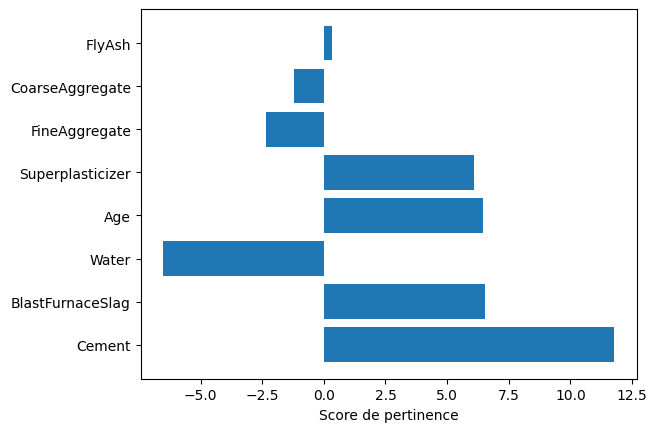

Cement: 8.9938788579588
Age: 4.7301657708742155
Superplasticizer: 4.54269694304409
Water: -3.3653687391454956
BlastFurnaceSlag: 3.1629288720672455
FineAggregate: -0.36588435879247616
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.462107937044974


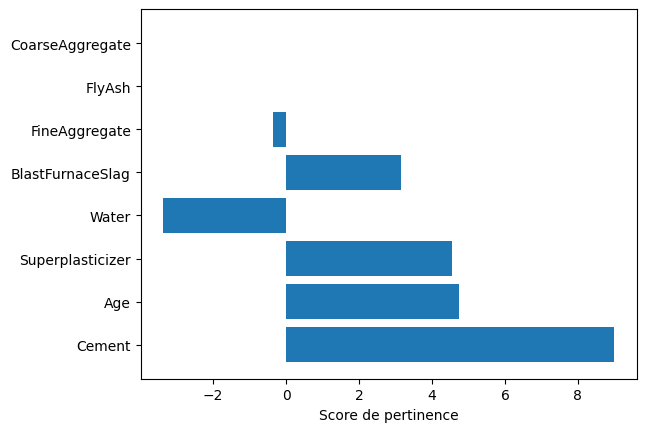

Cement: 9.919183137549167
Superplasticizer: 5.374724676102418
Age: 5.221364020964011
BlastFurnaceSlag: 4.288214472529205
Water: -3.9640945069143227
FineAggregate: -0.7520320264805765
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.1337694423354374


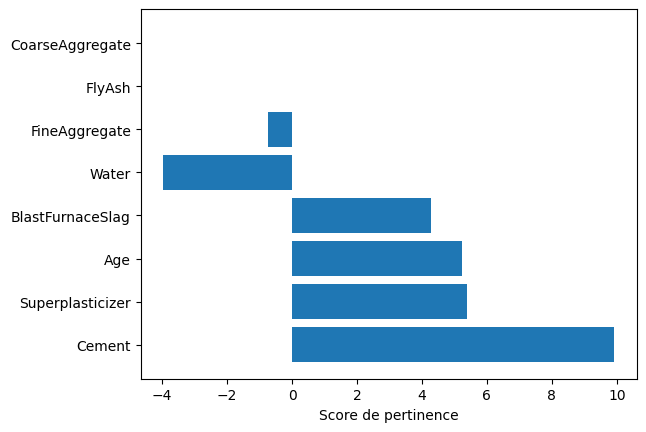

Cement: 16.702447560079413
BlastFurnaceSlag: 11.919121581871291
Age: 7.013176174534704
FlyAsh: 6.402887810502392
Water: -5.211216092444087
Superplasticizer: 5.096626730124783
CoarseAggregate: 0.36751080392956176
FineAggregate: -0.1841278707986265
alpha =  0.04221374671559283


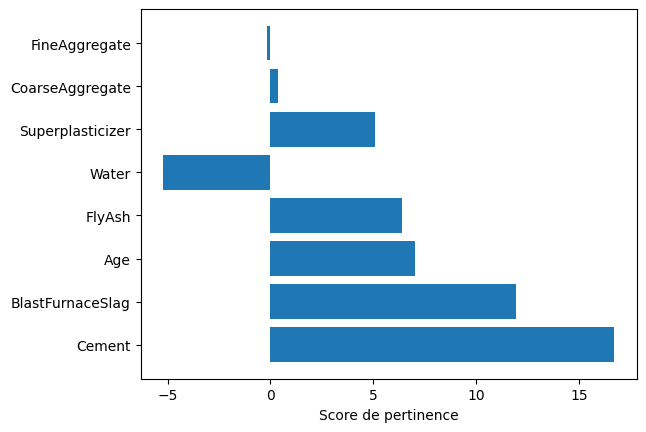

Cement: 11.021911082789035
Age: 6.061469404334497
Superplasticizer: 5.941324972668889
Water: -5.746133061366408
BlastFurnaceSlag: 5.641217521844768
FineAggregate: -1.9273679717047973
CoarseAggregate: -0.868077326617524
FlyAsh: 0.0
alpha =  0.5828152137158222


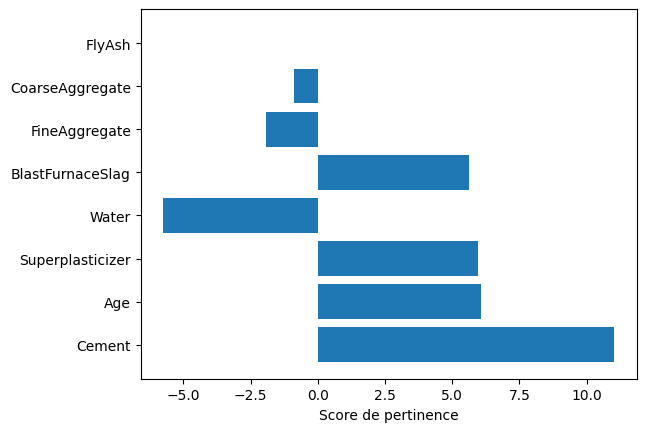

Cement: 9.8883770120858
Superplasticizer: 5.347069408896524
Age: 5.204962762483266
BlastFurnaceSlag: 4.250688648344258
Water: -3.943955387954854
FineAggregate: -0.7390837374577481
FlyAsh: 0.0
CoarseAggregate: -0.0
alpha =  1.1447237098396141


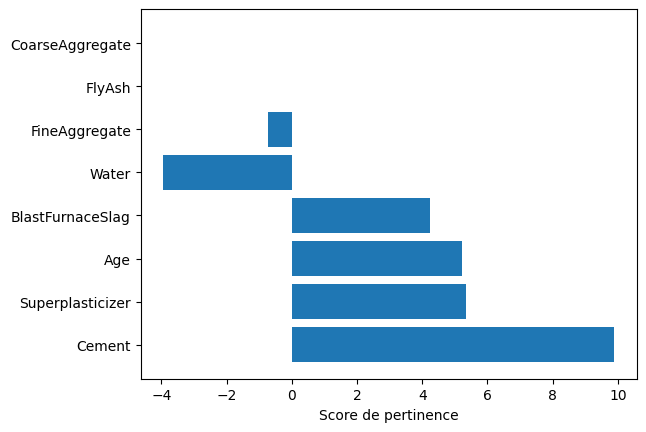

Cement: 10.430461181833522
Superplasticizer: 5.699466925905489
Age: 5.573771301823015
BlastFurnaceSlag: 4.913925751255412
Water: -4.634618630738489
FineAggregate: -1.1926271450133235
CoarseAggregate: -0.27524391522677927
FlyAsh: 0.0
alpha =  0.9015907205927955


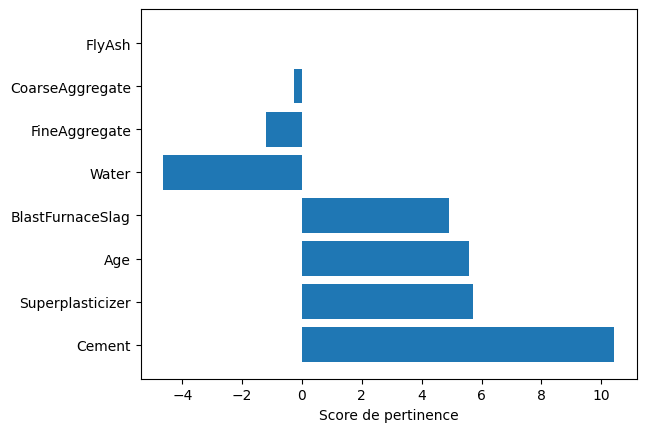

Cement: 11.175499613110164
Age: 6.184022700217723
Water: -6.017752197446735
Superplasticizer: 6.010210932628437
BlastFurnaceSlag: 5.82889924146529
FineAggregate: -2.107615420351231
CoarseAggregate: -1.012127282106923
FlyAsh: 0.0
alpha =  0.5024943389018682


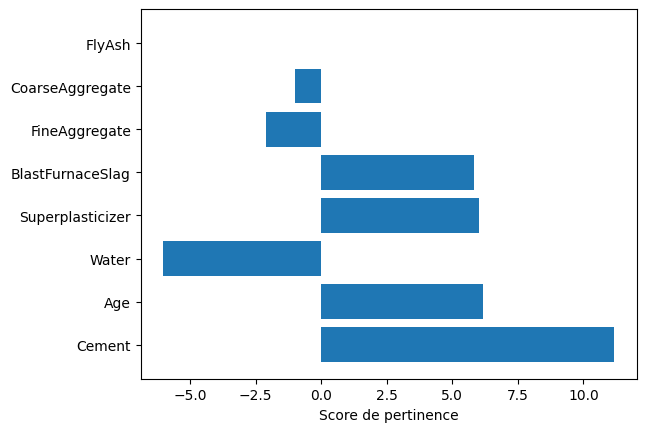

Cement: 10.431827797197831
Superplasticizer: 5.70003021153937
Age: 5.574895194890287
BlastFurnaceSlag: 4.915605381196891
Water: -4.637174476851498
FineAggregate: -1.194317139380641
CoarseAggregate: -0.27660649305883195
FlyAsh: 0.0
alpha =  0.9008559492644118


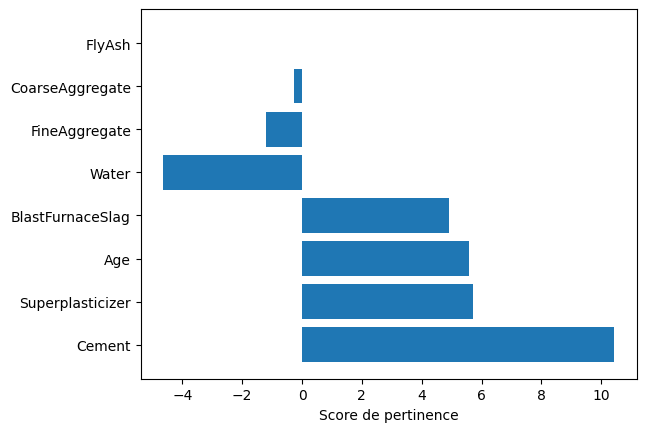

In [24]:
for elm in solution:
    for feature, importance in elm["feature_importance"]:
        print(f"{feature}: {importance}")
    plt.barh(*zip(* elm["feature_importance"]))
    plt.xlabel("Score de pertinence")
    print("alpha = ",elm['alpha'])
    plt.show()

In [25]:
look_lasso_solution(alpha_positif[:2])

[{'feature_importance': [('Cement', 8.536755958423063),
   ('Age', 4.487438475625674),
   ('Superplasticizer', 4.131717897169647),
   ('Water', -3.0693082349431604),
   ('BlastFurnaceSlag', 2.6069280770804215),
   ('FineAggregate', -0.17499533122710112),
   ('FlyAsh', 0.0),
   ('CoarseAggregate', -0.0)],
  'alpha': 1.6243453636632417},
 {'feature_importance': [('Cement', 10.497304379809561),
   ('Superplasticizer', 5.726414010832814),
   ('Age', 5.629149224740881),
   ('BlastFurnaceSlag', 4.996196436097493),
   ('Water', -4.761319914697749),
   ('FineAggregate', -1.2763355740521154),
   ('CoarseAggregate', -0.3428730127949528),
   ('FlyAsh', 0.0)],
  'alpha': 0.8654076293246785}]

### Commentaire  : On constate que:
POur ces 10 valeurs de alpha, un sous ensemble de variables est toujours selectione a savoir : Ciment, Age,Scories et Superplastifiant. On peut conclure que peurt importe la valeur de alpha, ces variables sont effectivement les plus pertinentes pour notre prediction.
De meme, pour certaines variables de alpha(sensiblement 0.03), on constate une cinquieme variable qui apparait a savoir les cendres volantes.

Conclusion : ces 5 variables sont les plus pertinentes.


Regression de Ridge

Cement: 17.386522232690982
BlastFurnaceSlag: 12.697662771024287
FlyAsh: 7.181993066176801
Age: 7.072129382029666
Superplasticizer: 5.221115171222178
Water: -4.817011389278578
CoarseAggregate: 0.8433976898124556
FineAggregate: 0.20918419660321189
alpha =  1.6243453636632417


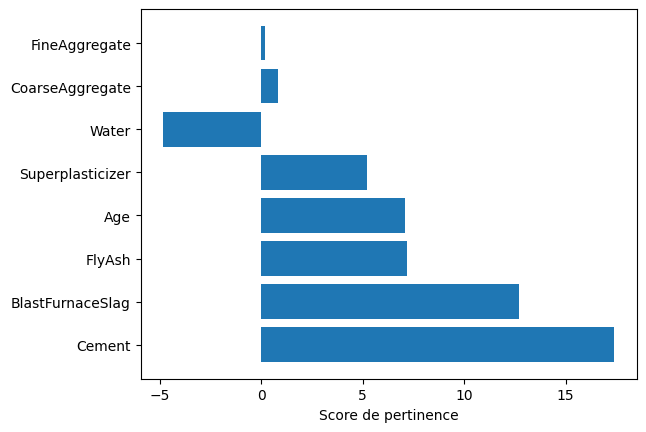

Cement: 17.816565546181266
BlastFurnaceSlag: 13.160097357570526
FlyAsh: 7.642675915118076
Age: 7.086901880593877
Superplasticizer: 5.221349263307331
Water: -4.566518722549916
CoarseAggregate: 1.0879290061878184
FineAggregate: 0.49454502503522935
alpha =  0.8654076293246785


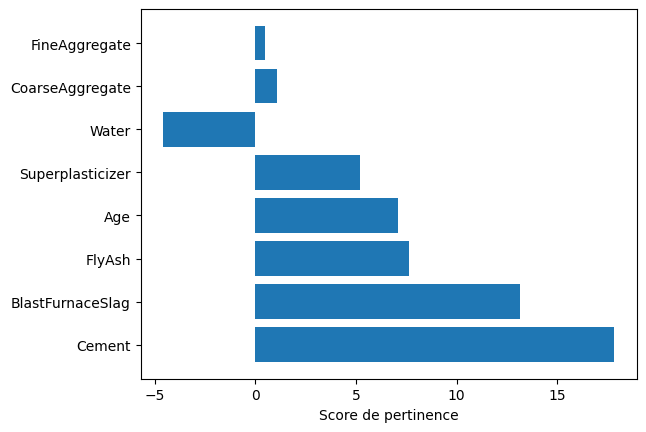

Cement: 17.322096493020585
BlastFurnaceSlag: 12.628437450564531
FlyAsh: 7.113101702891533
Age: 7.0698454521085345
Superplasticizer: 5.221165532899296
Water: -4.854208596699414
CoarseAggregate: 0.806929506066289
FineAggregate: 0.16663037886521767
alpha =  1.74481176421648


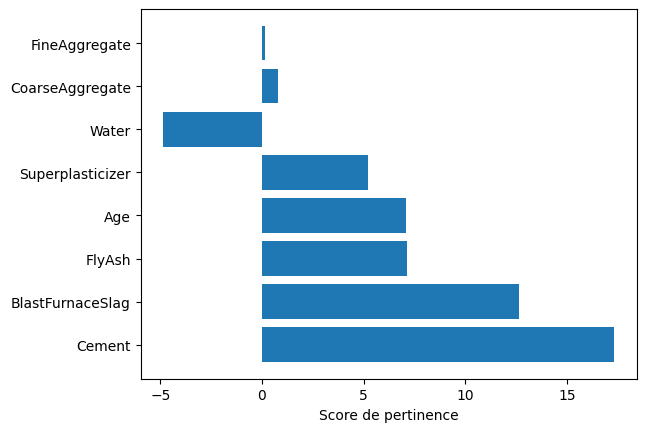

Cement: 18.154667559974893
BlastFurnaceSlag: 13.524059238636879
FlyAsh: 8.00578663115534
Age: 7.0979874952990825
Superplasticizer: 5.222198354074883
Water: -4.367104721727766
CoarseAggregate: 1.2814242475332005
FineAggregate: 0.7203692202800067
alpha =  0.31903909605709857


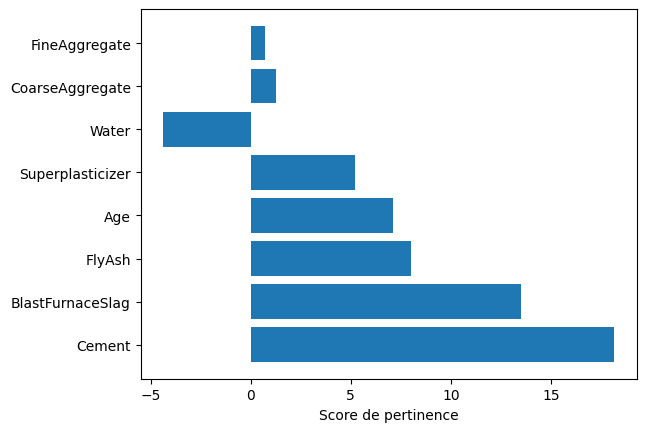

Cement: 17.474880801197475
BlastFurnaceSlag: 12.792627222122457
FlyAsh: 7.276531126834755
Age: 7.075230613135517
Superplasticizer: 5.221082982316137
Water: -4.765851671417639
CoarseAggregate: 0.8934856423632024
FineAggregate: 0.26763224011815423
alpha =  1.462107937044974


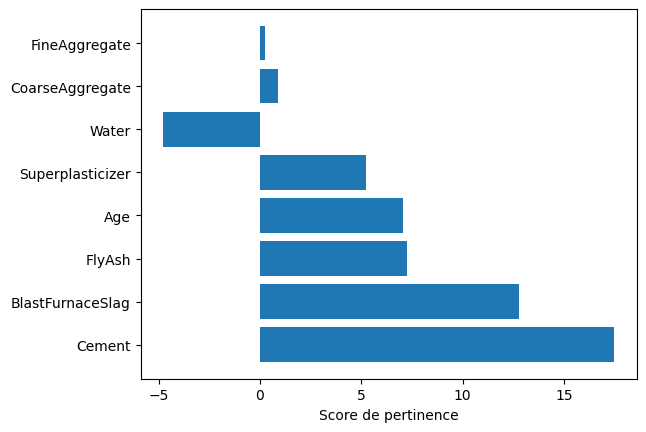

Cement: 17.659534542356162
BlastFurnaceSlag: 12.991169987811569
FlyAsh: 7.474295974195459
Age: 7.081599564013955
Superplasticizer: 5.221150934556866
Water: -4.658415301523762
CoarseAggregate: 0.9984226110293577
FineAggregate: 0.3900895603158466
alpha =  1.1337694423354374


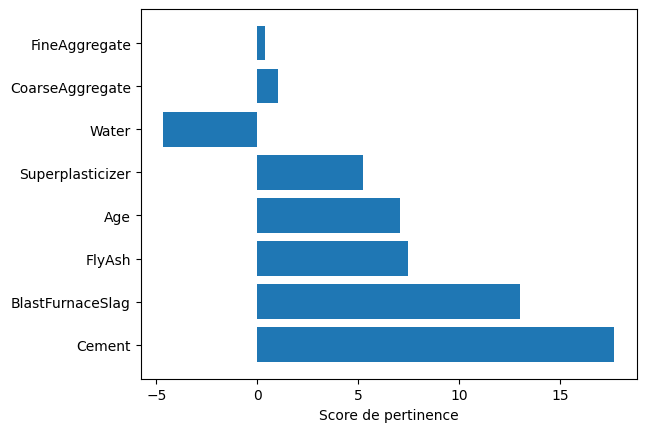

Cement: 18.336156326235862
BlastFurnaceSlag: 13.719557850212546
FlyAsh: 8.200998307424967
Age: 7.10376443100073
Superplasticizer: 5.222882865464423
Water: -4.259242800245754
CoarseAggregate: 1.3857014863260182
FineAggregate: 0.8420739607245158
alpha =  0.04221374671559283


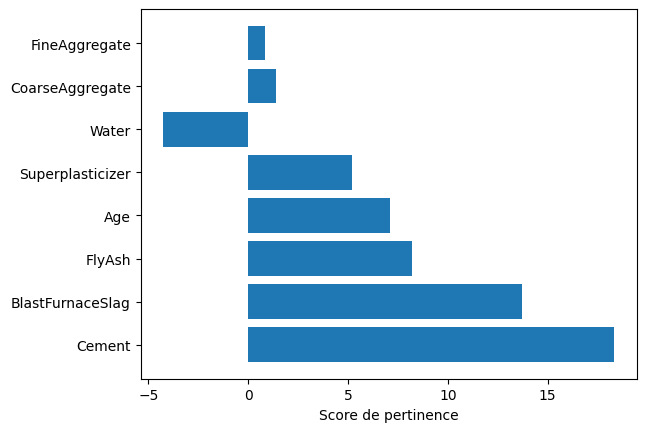

Cement: 17.988236209992465
BlastFurnaceSlag: 13.344857863813886
FlyAsh: 7.826950570302861
Age: 7.0925851062872995
Superplasticizer: 5.221709692193689
Water: -4.465523163288603
CoarseAggregate: 1.1860469768047843
FineAggregate: 0.6090546612376682
alpha =  0.5828152137158222


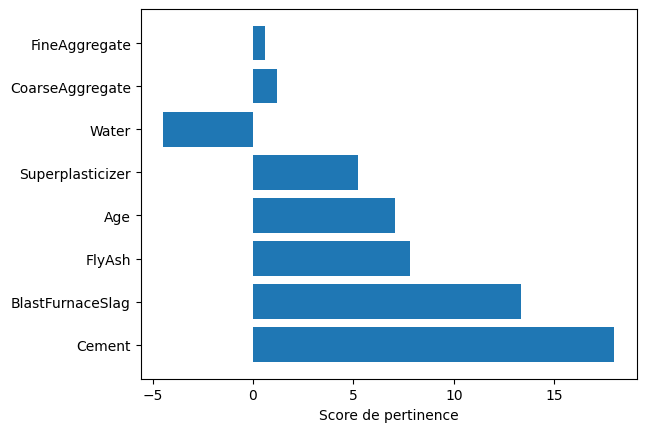

Cement: 17.653243940426613
BlastFurnaceSlag: 12.984404417249227
FlyAsh: 7.46755446992501
Age: 7.081385016110217
Superplasticizer: 5.221145653973484
Water: -4.662086640267547
CoarseAggregate: 0.994842044127193
FineAggregate: 0.385911068161994
alpha =  1.1447237098396141


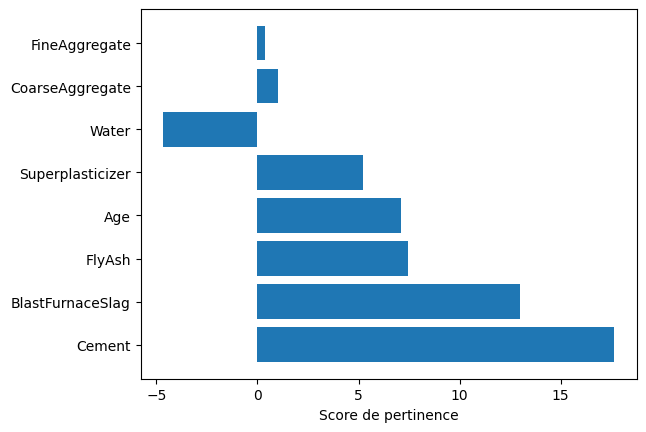

Cement: 17.79506012944151
BlastFurnaceSlag: 13.13695827823296
FlyAsh: 7.619605851087379
Age: 7.0861817051266405
Superplasticizer: 5.221314603638983
Water: -4.579131953017079
CoarseAggregate: 1.0756570366697482
FineAggregate: 0.48022319033413446
alpha =  0.9015907205927955


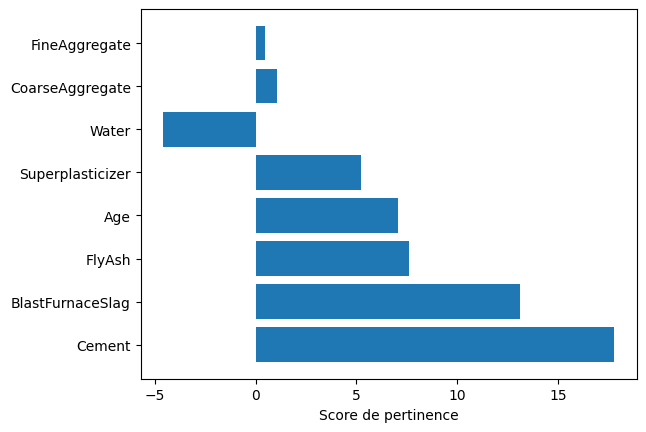

Cement: 18.03826562127046
BlastFurnaceSlag: 13.398717909627617
FlyAsh: 7.880690154900083
Age: 7.094219928184869
Superplasticizer: 5.221842357523433
Water: -4.435989662911969
CoarseAggregate: 1.2146917609833743
FineAggregate: 0.6424855879518108
alpha =  0.5024943389018682


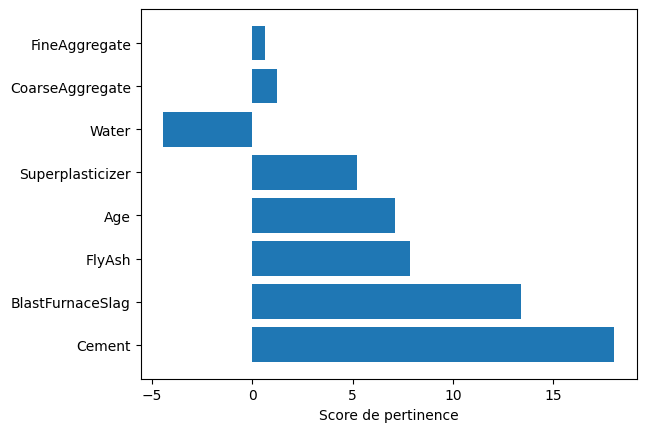

Cement: 17.795495791399308
BlastFurnaceSlag: 13.137427021510916
FlyAsh: 7.62007317779495
Age: 7.086196313171902
Superplasticizer: 5.221315282346823
Water: -4.578876518080877
CoarseAggregate: 1.0759056015289767
FineAggregate: 0.4805132738474145
alpha =  0.9008559492644118


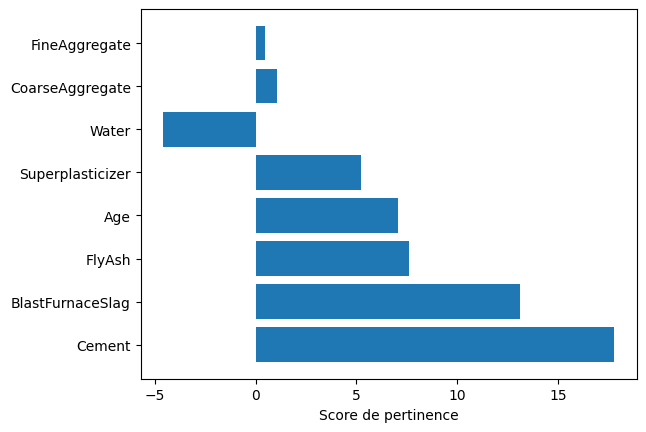

In [26]:
def look_ridge_solution(alpha_positif):
    sol = []
    for coef in alpha_positif:
        clf = linear_model.Ridge(alpha=coef, random_state=42)
        clf.fit(X_iforest, y_iforest)
        feature_importance_dict = dict(zip(normData.columns, clf.coef_))
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
        sol.append({
            "feature_importance": sorted_feature_importance,
            "alpha": coef,
        })
    return sol

solution_ridge = look_ridge_solution(alpha_positif[:12])

for elm in solution_ridge:
    for feature, importance in elm["feature_importance"]:
        print(f"{feature}: {importance}")
    plt.barh(*zip(* elm["feature_importance"]))
    plt.xlabel("Score de pertinence")
    print("alpha = ",elm['alpha'])
    plt.show()

### Commentaire :
On constate que: Ridge selectionne a chaque fois 7 variables pertinentes. Il est moins aggressif que Lasso.

Cement: 3.2506684613929484
Age: 2.8068441122900287
Water: -2.314366004830803
Superplasticizer: 1.8500898014143603
FineAggregate: -1.105845046504244
CoarseAggregate: -0.9594511688643595
BlastFurnaceSlag: 0.732926234419793
FlyAsh: -0.0
alpha =  1.6243453636632417


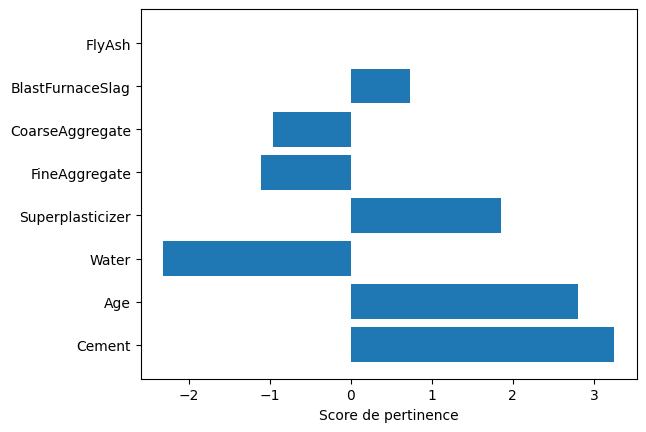

Cement: 5.0628027056792195
Age: 3.9847186028975883
Water: -3.7984438073622875
Superplasticizer: 2.9663689075002226
FineAggregate: -1.9597510758940926
BlastFurnaceSlag: 1.6720102240363441
CoarseAggregate: -1.5863644101651482
FlyAsh: -0.0
alpha =  0.8654076293246785


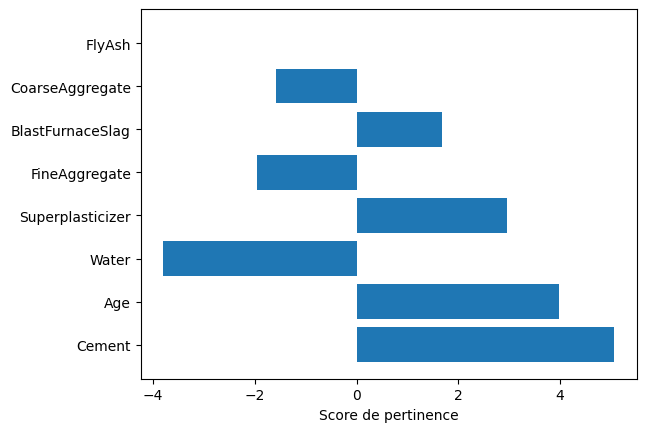

Cement: 3.059490845895636
Age: 2.6710831325653106
Water: -2.1580392884234327
Superplasticizer: 1.7268037196988348
FineAggregate: -1.0124166174189613
CoarseAggregate: -0.8856735913482316
BlastFurnaceSlag: 0.6416248567224763
FlyAsh: -0.0
alpha =  1.74481176421648


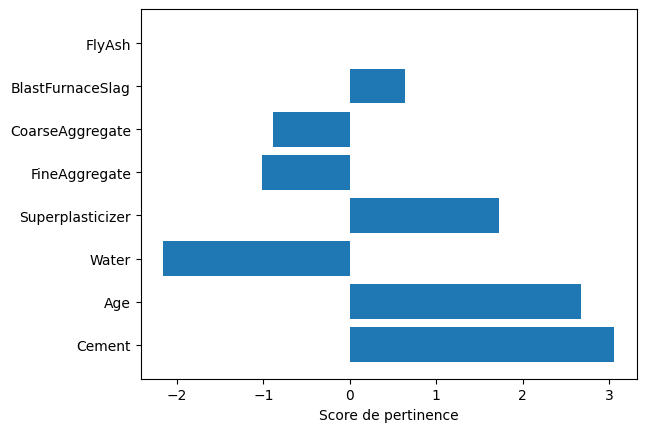

Cement: 7.877112998895138
Water: -6.005050159240477
Age: 5.485486424165371
Superplasticizer: 4.449145756457998
BlastFurnaceSlag: 3.436310079885841
FineAggregate: -3.058634748643149
CoarseAggregate: -2.255972380322612
FlyAsh: -0.034320399305461
alpha =  0.31903909605709857


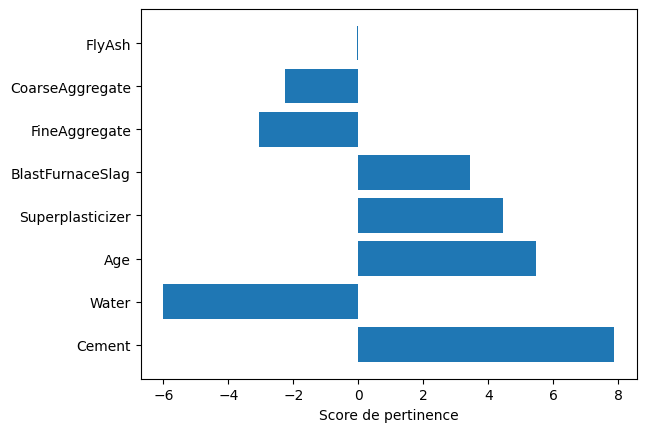

Cement: 3.5389786918674804
Age: 3.0071329286230473
Water: -2.550579059078965
Superplasticizer: 2.0343091582508626
FineAggregate: -1.2458785933227732
CoarseAggregate: -1.0680770617686701
BlastFurnaceSlag: 0.8732900790096579
FlyAsh: -0.0
alpha =  1.462107937044974


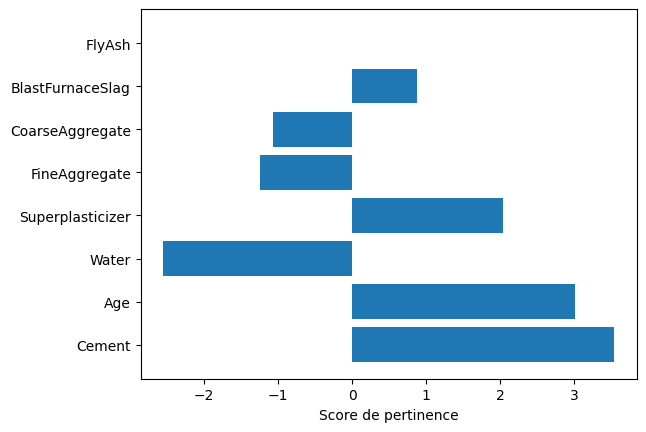

Cement: 4.2645482713821865
Age: 3.488792533326916
Water: -3.14568550085985
Superplasticizer: 2.487615184309452
FineAggregate: -1.5922112559669408
CoarseAggregate: -1.3268563354286864
BlastFurnaceSlag: 1.2412832354726855
FlyAsh: -0.0
alpha =  1.1337694423354374


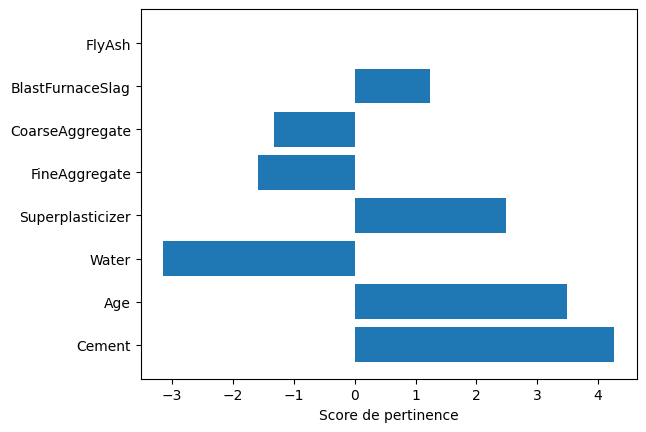

Cement: 12.481353348456496
BlastFurnaceSlag: 7.502637579573911
Water: -7.104536460906209
Age: 6.767097370595307
Superplasticizer: 5.328086436164105
FineAggregate: -2.6779387328248787
FlyAsh: 2.097260889162687
CoarseAggregate: -1.6382409384993115
alpha =  0.04221374671559283


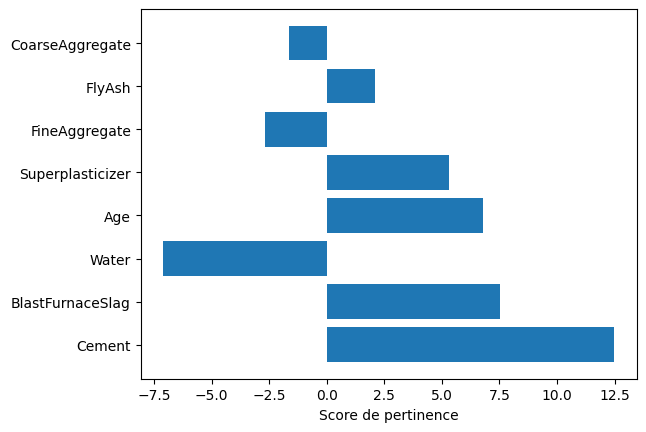

Cement: 6.227192275124966
Water: -4.744423308837666
Age: 4.652884354216068
Superplasticizer: 3.628753983905744
FineAggregate: -2.4638514307511796
BlastFurnaceSlag: 2.3508877905752095
CoarseAggregate: -1.916306369541706
FlyAsh: -0.029055404571814675
alpha =  0.5828152137158222


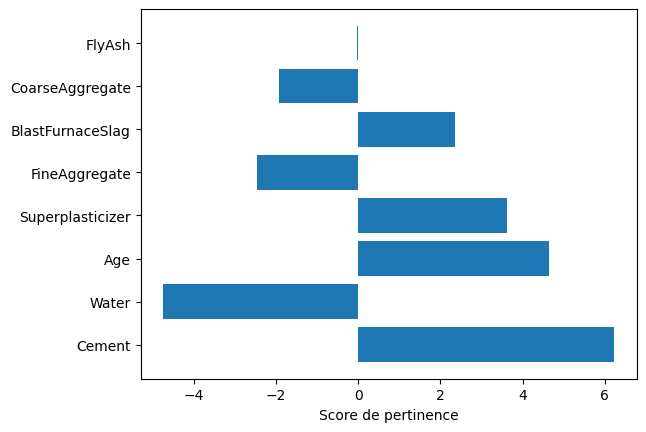

Cement: 4.236526847193425
Age: 3.470757009372906
Water: -3.1227115046010017
Superplasticizer: 2.4704077884502955
FineAggregate: -1.5790263945845324
CoarseAggregate: -1.3172586178422199
BlastFurnaceSlag: 1.2266668517993602
FlyAsh: -0.0
alpha =  1.1447237098396141


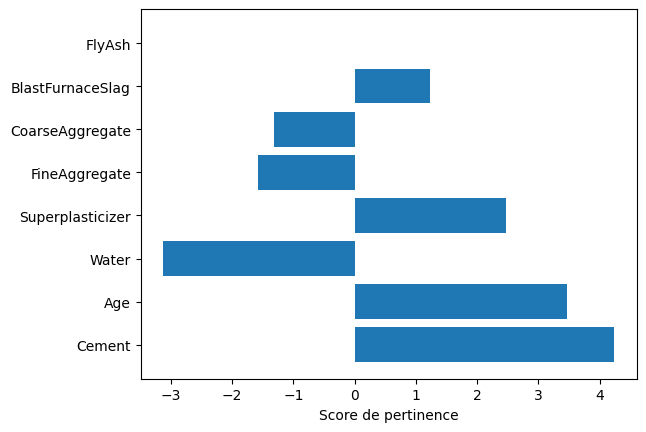

Cement: 4.940809724259208
Age: 3.911115150204572
Water: -3.6990336304845157
Superplasticizer: 2.894711480824749
FineAggregate: -1.9047103481345409
BlastFurnaceSlag: 1.604349021798239
CoarseAggregate: -1.548496911654335
FlyAsh: -0.0
alpha =  0.9015907205927955


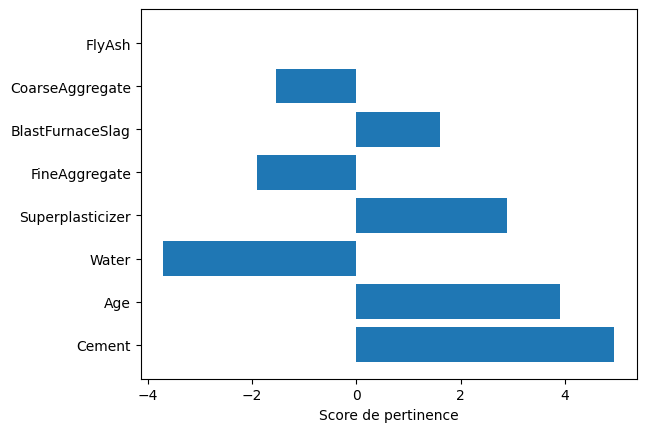

Cement: 6.648265877154035
Water: -5.083194034277032
Age: 4.87993734004944
Superplasticizer: 3.8583041585622184
FineAggregate: -2.634696179914648
BlastFurnaceSlag: 2.6118405682217722
CoarseAggregate: -2.0206273040536082
FlyAsh: -0.05205213264629197
alpha =  0.5024943389018682


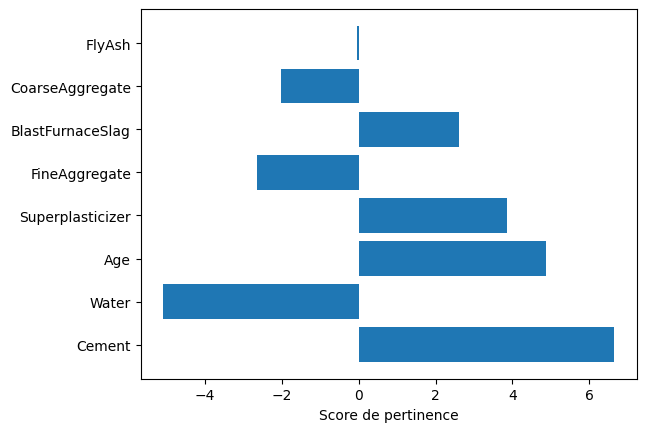

Cement: 4.943236244688917
Age: 3.9125866764567343
Water: -3.701012515920185
Superplasticizer: 2.896142352996524
FineAggregate: -1.905809480168208
BlastFurnaceSlag: 1.605688247163614
CoarseAggregate: -1.5492565615480716
FlyAsh: -0.0
alpha =  0.9008559492644118


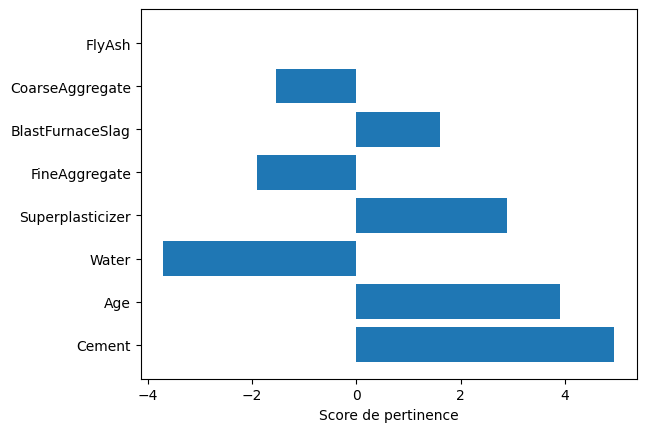

In [27]:
def look_elastic_solution(alpha_positif):
    sol = []
    for coef in alpha_positif:
        clf = linear_model.ElasticNet(alpha=coef, random_state=42)
        clf.fit(X_iforest, y_iforest)
        feature_importance_dict = dict(zip(normData.columns, clf.coef_))
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
        sol.append({
            "feature_importance": sorted_feature_importance,
            "alpha": coef,
        })
    return sol

solution_elastic = look_elastic_solution(alpha_positif[:12])

for elm in solution_elastic:
    for feature, importance in elm["feature_importance"]:
        print(f"{feature}: {importance}")
    plt.barh(*zip(* elm["feature_importance"]))
    plt.xlabel("Score de pertinence")
    print("alpha = ",elm['alpha'])
    plt.show()

### Commentaire :
On constate que: Elastic Net qui est la combinaison de Ridge et de Lasso se comporte exactement comme Lasso. Ce qui pourrait etre du au parametre alpha qui probablement est plus favorable a la normalisation L1. 

Pour ameliorer la prediction, on va proceder a l'isolation des valeurs aberrantes. Et eventuellement utiliser la methode de l'article 2 pour optimiser les variables pertinentes. Penser aussi a stocker le meilleur modele catboost

In [28]:
clf.coef_

array([15.73441032, 11.38679459,  6.86187426, -5.69964405,  2.85733821,
        0.        , -0.01951756,  5.43509998])

In [29]:
# ranger les indices selon l'ordre croissant et recuperer les 7 dernieres indices correspondants aux 7 variables les plus pertinentes.
b=np.argsort(clf.coef_)[-8:]
b

array([3, 6, 5, 4, 7, 2, 1, 0])

In [30]:
# type(normData)

In [31]:
# numpyData = normData.to_numpy()
# type(numpyData)

In [32]:
tab=[np.reshape(X_iforest[:,x], (X_iforest.shape[0],1))  for x in b]

In [33]:
d = np.concatenate(tab, axis=1)

In [34]:
d_data=pd.DataFrame(d)
d_data

,0,1,2,3,4,5,6,7
0,-0.848708,-1.112413,0.739220,-0.378937,0.000000,0.000000,-0.153900,1.694528
1,-0.848708,-1.112413,0.893224,-0.378937,0.000000,0.000000,-0.153900,1.694528
2,0.258303,0.494250,0.106776,-0.625000,6.775510,0.000000,0.772298,-0.471372
3,1.586716,-1.176894,-0.369610,-0.625000,1.265306,0.000000,0.643582,-0.043775
4,1.586716,-1.993659,-0.369610,-0.625000,0.000000,0.000000,0.510668,0.679461
...,...,...,...,...,...,...,...,...
973,-0.199262,-0.120473,-1.005133,0.250984,0.000000,0.763507,0.657573,0.022205
974,0.405904,0.364213,-1.541068,0.398622,0.000000,0.977425,-0.153900,0.312768
975,0.284133,0.005266,-0.776181,-0.024606,0.000000,0.918238,0.821266,-0.789215
976,-0.346863,0.100913,0.221766,0.487205,0.000000,0.000000,1.152151,-0.721967


In [35]:
y_iforest=pd.DataFrame(y_iforest)
y_iforest

,0
0,79.986111
1,61.887366
2,44.296075
3,47.029847
4,36.447770
...,...
973,44.284354
974,31.178794
975,23.696601
976,32.768036


In [36]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

kf=KFold(n_splits=10,shuffle=True,random_state=42)

In [37]:
rmse_tab_error = []
mse_tab_error = []
mae_tab_error = []
r2_tab_error = []

In [38]:
import catboost
from catboost import CatBoostRegressor

In [39]:
d_data

,0,1,2,3,4,5,6,7
0,-0.848708,-1.112413,0.739220,-0.378937,0.000000,0.000000,-0.153900,1.694528
1,-0.848708,-1.112413,0.893224,-0.378937,0.000000,0.000000,-0.153900,1.694528
2,0.258303,0.494250,0.106776,-0.625000,6.775510,0.000000,0.772298,-0.471372
3,1.586716,-1.176894,-0.369610,-0.625000,1.265306,0.000000,0.643582,-0.043775
4,1.586716,-1.993659,-0.369610,-0.625000,0.000000,0.000000,0.510668,0.679461
...,...,...,...,...,...,...,...,...
973,-0.199262,-0.120473,-1.005133,0.250984,0.000000,0.763507,0.657573,0.022205
974,0.405904,0.364213,-1.541068,0.398622,0.000000,0.977425,-0.153900,0.312768
975,0.284133,0.005266,-0.776181,-0.024606,0.000000,0.918238,0.821266,-0.789215
976,-0.346863,0.100913,0.221766,0.487205,0.000000,0.000000,1.152151,-0.721967


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


for train_index, test_index in kf.split(d_data):
        
        X_train, X_test = d_data.iloc[train_index], d_data.iloc[test_index]# echantillonnage du jeu d'entrainement
        # y_train, y_test = y.iloc[train_index], y.iloc[test_index]#  echantillonnage du jeu de test
        # After isolation forest we have
        y_train, y_test = y_iforest.iloc[train_index], y_iforest.iloc[test_index]

        catb= CatBoostRegressor(random_state=42, bagging_temperature= 25.71, l2_leaf_reg= 3.82, learning_rate= 0.18,
    max_bin= 1531, min_data_in_leaf= 26, random_strength= 3.10, subsample= 0.97)
        catb.fit(X_train, y_train)

        y_pred = catb.predict(X_test)

           # predict in the last fold the model trained in the 9 folds 
        rmse = mean_squared_error(y_test,y_pred,squared=False)
        mse = mean_squared_error(y_test,y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        r2 = r2_score(y_test, y_pred)

        ## append each metric for each fold in its corresponding table
        rmse_tab_error.append(rmse)
        mse_tab_error.append(mse)
        mae_tab_error.append(mae)
        r2_tab_error.append(r2)

print("\n*********Test metrics*********\n")
print("\t RMSE : {:.3f} \t MSE : {:.3f} \t MAE : {:.3f} \t R2 : {:.3f}".format(np.mean(np.array(rmse_tab_error)),
                        np.mean(np.array(mse_tab_error)), np.mean(np.array(mae_tab_error)), np.mean(np.array(r2_tab_error))))

0:	learn: 15.0026521	total: 48.3ms	remaining: 48.2s
1:	learn: 13.5880497	total: 50.1ms	remaining: 25s
2:	learn: 12.5052104	total: 51.8ms	remaining: 17.2s
3:	learn: 11.5164858	total: 53.4ms	remaining: 13.3s
4:	learn: 10.5903270	total: 55ms	remaining: 10.9s
5:	learn: 9.8528043	total: 56.6ms	remaining: 9.38s
6:	learn: 9.3915388	total: 58.2ms	remaining: 8.25s
7:	learn: 8.7986001	total: 59.7ms	remaining: 7.4s
8:	learn: 8.3620669	total: 60.9ms	remaining: 6.7s
9:	learn: 7.9762248	total: 62ms	remaining: 6.14s
10:	learn: 7.6122971	total: 63.3ms	remaining: 5.69s
11:	learn: 7.2866058	total: 64.5ms	remaining: 5.31s
12:	learn: 7.0152454	total: 66.2ms	remaining: 5.03s
13:	learn: 6.8575289	total: 67.8ms	remaining: 4.78s
14:	learn: 6.5690499	total: 69.3ms	remaining: 4.55s
15:	learn: 6.4431644	total: 71ms	remaining: 4.37s
16:	learn: 6.2758837	total: 72.8ms	remaining: 4.21s
17:	learn: 6.1618988	total: 74.5ms	remaining: 4.06s
18:	learn: 6.0848739	total: 75.9ms	remaining: 3.92s
19:	learn: 5.9847741	total:

#### Commentaire: il y'a un soucis car apres suppression des valeurs aberrantes, on constate qu'il ya pas augmentation de metriques 

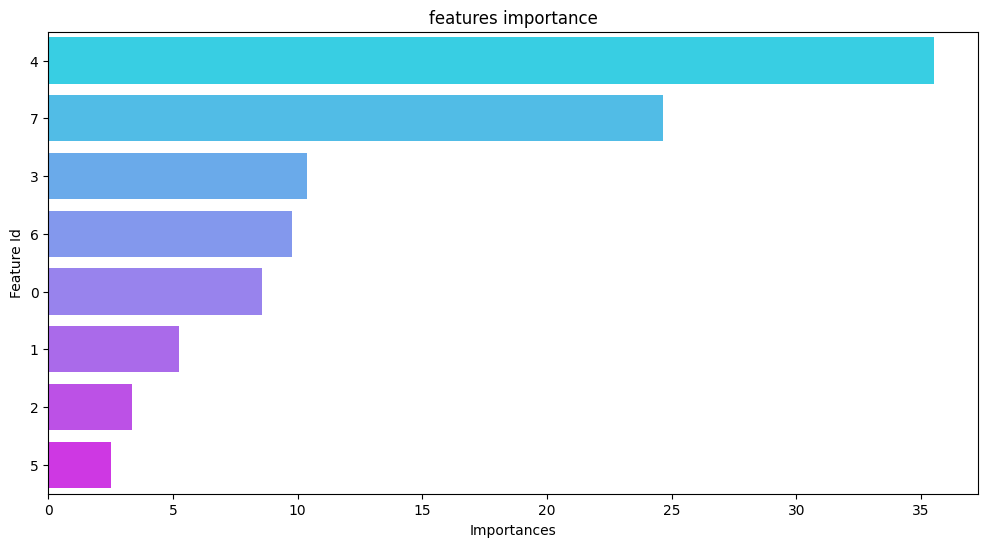

In [41]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(catb.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6))
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool")
plt.title('features importance')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from metrics.mean_poisson_deviance import mean_poisson_deviance
# from metrics.mean_gamma_deviance import mean_gamma_deviance 
# from metrics.max_error import max_error
from sklearn.ensemble import RandomForestRegressor

for train_index, test_index in kf.split(d_data):
        
        X_train, X_test = d_data.iloc[train_index], d_data.iloc[test_index]# echantillonnage du jeu d'entrainement
        # y_train, y_test = y.iloc[train_index], y.iloc[test_index]#  echantillonnage du jeu de test
        # After isolation forest we have
        y_train, y_test = y_iforest.iloc[train_index], y_iforest.iloc[test_index]

        rfr = RandomForestRegressor(random_state=42,n_estimators=1000)

        rfr.fit(X_train, y_train)

        y_pred = rfr.predict(X_test)

           # predict in the last fold the model trained in the 9 folds 
        rmse = mean_squared_error(y_test,y_pred,squared=False)
        mse = mean_squared_error(y_test,y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        r2 = r2_score(y_test, y_pred)

        ## append each metric for each fold in its corresponding table
        rmse_tab_error.append(rmse)
        mse_tab_error.append(mse)
        mae_tab_error.append(mae)
        r2_tab_error.append(r2)

print("\n*********Test metrics*********\n")
print("\t RMSE : {:.3f} \t MSE : {:.3f} \t MAE : {:.3f} \t R2 : {:.3f}".format(np.mean(np.array(rmse_tab_error)),
                        np.mean(np.array(mse_tab_error)), np.mean(np.array(mae_tab_error)), np.mean(np.array(r2_tab_error))))


*********Test metrics*********

	 RMSE : 4.353 	 MSE : 19.538 	 MAE : 2.832 	 R2 : 0.927


In [43]:
rfr.feature_importances_


array([0.11958584, 0.0366034 , 0.03334336, 0.07582769, 0.32976703,
       0.02122561, 0.08374868, 0.2998984 ])

evaluer cette importance des variables la en fonction de la metrique utilisee: predictionvaluechange,intervaluechange,...